###Importar librerías y cargar los datos

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Ruta al archivo (ajusta según la ubicación en tu PC)
file_path = "C:\\Users\\Roberto\\Downloads\\BD_Diplomas_sector_estatal_y_privado_2021_2023\\BD_Diplomas_sector_estatal_y_privado_2021_2024.xlsx"

# Cargar hoja principal
df = pd.read_excel(file_path, sheet_name="Diplomas 2021-2023")


class EDAUniversidades:
    def __init__(self, dataframe: pd.DataFrame):
        self.df = dataframe

    def _check_column(self, col_name):
        """Verifica si la columna existe en el DataFrame."""
        if col_name not in self.df.columns:
            print(f"⚠️ Columna '{col_name}' no encontrada en el DataFrame.")
            return False
        return True

    def resumen_general(self):
        print("===== Resumen General =====")
        print(self.df.info())
        print("\nDescripción estadística:")
        print(self.df.describe(include='all'))
        print("\nValores nulos:")
        print(self.df.isnull().sum())

    def diplomas_por_anio(self):
        if not self._check_column('AÑO'):
            return
        conteo = self.df['AÑO'].value_counts().sort_index()
        print("\n===== Diplomas por Año =====")
        print(conteo)
        conteo.plot(kind='bar', figsize=(7, 4), title='Diplomas por Año')
        plt.xlabel("Año")
        plt.ylabel("Cantidad de diplomas")
        plt.show()

    def diplomas_por_sector(self):
        if not self._check_column('SECTOR_UNIVERSITARIO'):
            return
        conteo = self.df['SECTOR_UNIVERSITARIO'].value_counts()
        print("\n===== Diplomas por Sector Universitario =====")
        print(conteo)
        conteo.plot(kind='bar', figsize=(6, 4), title='Diplomas por Sector Universitario', color='teal')
        plt.xlabel("Sector")
        plt.ylabel("Cantidad")
        plt.show()

    def diplomas_por_universidad(self, top_n=10):
        if not self._check_column('UNIVERSIDAD'):
            return
        conteo = self.df['UNIVERSIDAD'].value_counts().head(top_n)
        print(f"\n===== Top {top_n} Universidades =====")
        print(conteo)
        conteo.plot(kind='barh', figsize=(8, 5), title=f'Top {top_n} Universidades con más Diplomas', color='orange')
        plt.xlabel("Cantidad de diplomas")
        plt.ylabel("Universidad")
        plt.show()

    def grados_academicos(self):
        if not self._check_column('GRADO_ACADEMICO'):
            return
        conteo = self.df['GRADO_ACADEMICO'].value_counts()
        print("\n===== Grados Académicos =====")
        print(conteo)
        conteo.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Distribución de Grados Académicos')
        plt.ylabel("")
        plt.show()

    def carreras_mas_frecuentes(self, top_n=10):
        if not self._check_column('CARRERA'):
            return
        conteo = self.df['CARRERA'].value_counts().head(top_n)
        print(f"\n===== Top {top_n} Carreras =====")
        print(conteo)
        sns.barplot(x=conteo.values, y=conteo.index, palette="viridis")
        plt.title(f'Top {top_n} Carreras con más Diplomas')
        plt.xlabel("Cantidad")
        plt.ylabel("Carrera")
        plt.show()

    def sedes_conare(self, top_n=10):
        if not self._check_column('SEDE_CONARE'):
            return
        conteo = self.df['SEDE_CONARE'].value_counts().head(top_n)
        print(f"\n===== Top {top_n} Sedes CONARE =====")
        print(conteo)
        sns.barplot(x=conteo.values, y=conteo.index, palette="magma")
        plt.title(f'Top {top_n} Sedes CONARE con más Diplomas')
        plt.xlabel("Cantidad")
        plt.ylabel("Sede")
        plt.show()






### Resumen general



In [27]:
eda.resumen_general()


===== Resumen General =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174118 entries, 0 to 174117
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   AÑO                            174118 non-null  int64 
 1   SECTOR_UNIVERSITARIO           174118 non-null  object
 2   UNIVERSIDAD                    174118 non-null  object
 3   GAM_SEDE                       174118 non-null  object
 4   SEDE_CONARE                    174118 non-null  object
 5   REGION_PLANIFICACION_SEDE      174118 non-null  object
 6   CARRERA                        174118 non-null  object
 7   GRADO_ACADEMICO                174118 non-null  object
 8   NIVEL_ACADEMICO                174118 non-null  object
 9   AREA_CONOCIMIENTO              174118 non-null  object
 10  DISCIPLINA                     174118 non-null  object
 11  AREA_UNESCO                    174118 non-null  object
 12  DISCIPLINA_UNESC

### Visualizacion de Diplomas por Año



===== Diplomas por Año =====
AÑO
2021    52135
2022    50415
2023    51112
2024    20456
Name: count, dtype: int64


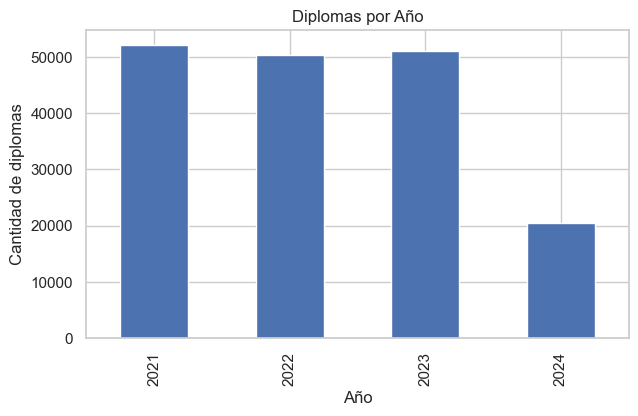

In [26]:
eda.diplomas_por_anio()

### Visualizacion de diplomas por sector universitario


===== Diplomas por Sector Universitario =====
SECTOR_UNIVERSITARIO
Sector Privado    90801
Sector Estatal    83317
Name: count, dtype: int64


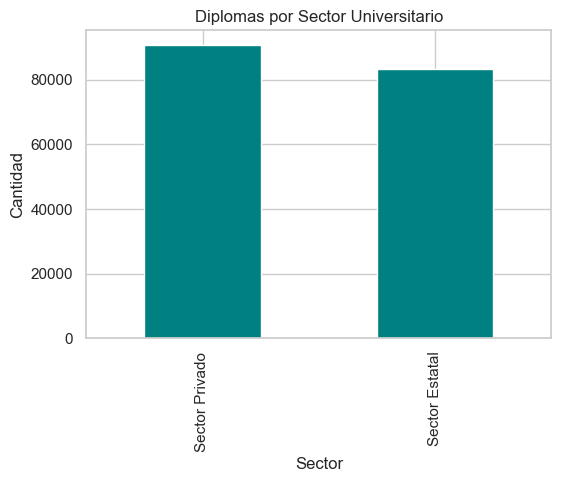

In [29]:
eda.diplomas_por_sector()


### Universidades


===== Top 10 Universidades =====
UNIVERSIDAD
Universidad de Costa Rica                              24793
Universidad Estatal a Distancia                        21654
Universidad Nacional                                   16436
Universidad Técnica Nacional                           12652
Tecnológico de Costa Rica                               7782
Universidad Metropolitana Castro Carazo                 7429
Universidad Latina de Costa Rica                        7052
Universidad Americana                                   6725
Universidad Internacional San Isidro Labrador           6718
Universidad de las Ciencias y el Arte de Costa Rica     4872
Name: count, dtype: int64


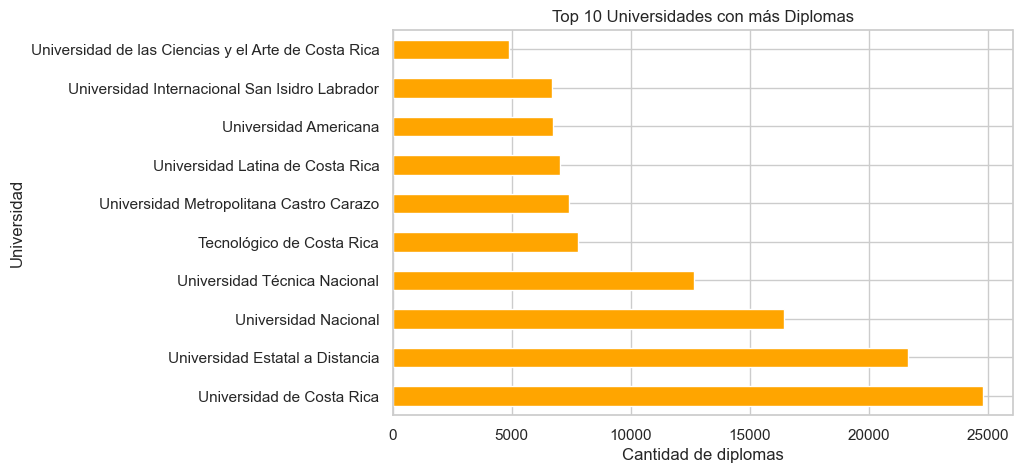

In [30]:
eda.diplomas_por_universidad(top_n=10)


### Distribucion de grados academicos


===== Grados Académicos =====
GRADO_ACADEMICO
Bachillerato                57566
Licenciatura                38208
BACHILLERATO                23618
LICENCIATURA                17382
Diplomado                   14773
Maestría                     8732
DIPLOMADO                    4617
MAESTRÍA                     3883
Especialidad Profesional     2260
ESPECIALIDAD PROFESIONAL     1185
Profesorado                   938
PROFESORADO                   296
Doctorado                     282
Especialidad profesional      247
DOCTORADO                     131
Name: count, dtype: int64


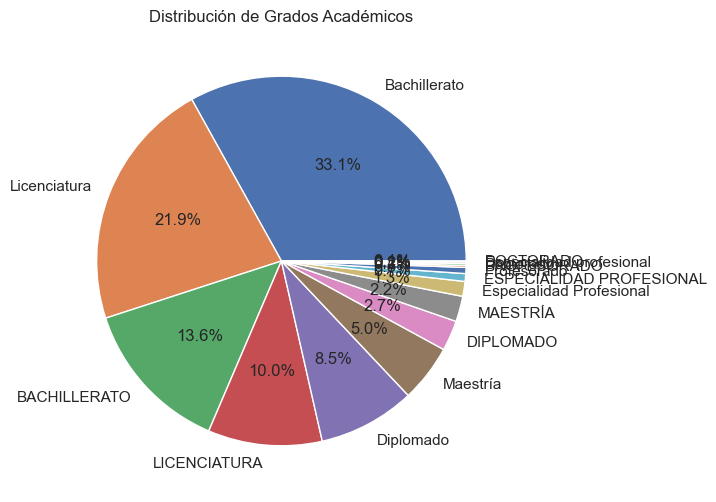

In [31]:
eda.grados_academicos()

### Top Carreras


===== Top 10 Carreras =====
CARRERA
Administración de Empresas                7954
Derecho                                   6418
Administración de Negocios                4540
Educación General Básica I y II Ciclos    3948
Ingeniería Industrial                     3776
Enfermería                                3608
Contaduría Pública                        3050
Contaduría                                2974
Derecho Notarial y Registral              2845
Educación Preescolar                      2657
Name: count, dtype: int64


C:\Users\Roberto\AppData\Local\Temp\ipykernel_22760\3773386084.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette="viridis")


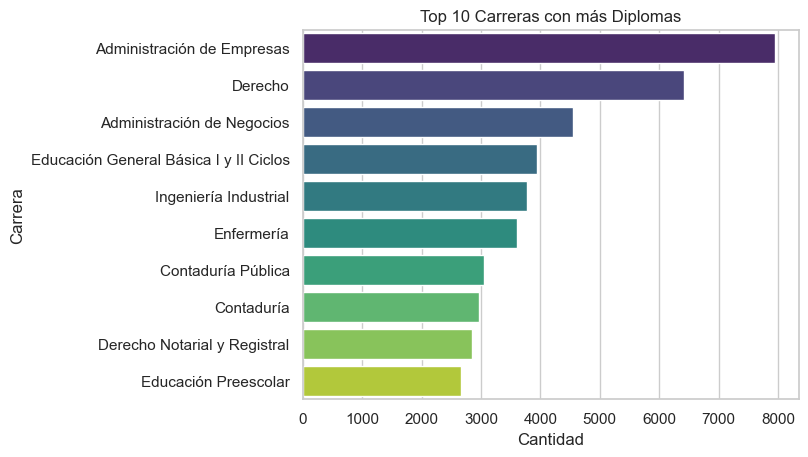

In [32]:
eda.carreras_mas_frecuentes(top_n=10)

### Top Sedes CONARE


===== Top 10 Sedes CONARE =====
SEDE_CONARE
Sede Central San José                 38941
Ciudad Universitaria Rodrigo Facio    18525
Sede Omar Dengo                       12021
Sede Central                           8539
Sede Regional Heredia                  7622
Campus Tecnológico Central Cartago     5930
Sede Central San Pedro                 5700
Sede Pacífico                          2423
Sede Regional Guápiles                 2360
Sede Central Cartago                   2277
Name: count, dtype: int64


C:\Users\Roberto\AppData\Local\Temp\ipykernel_22760\3773386084.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette="magma")


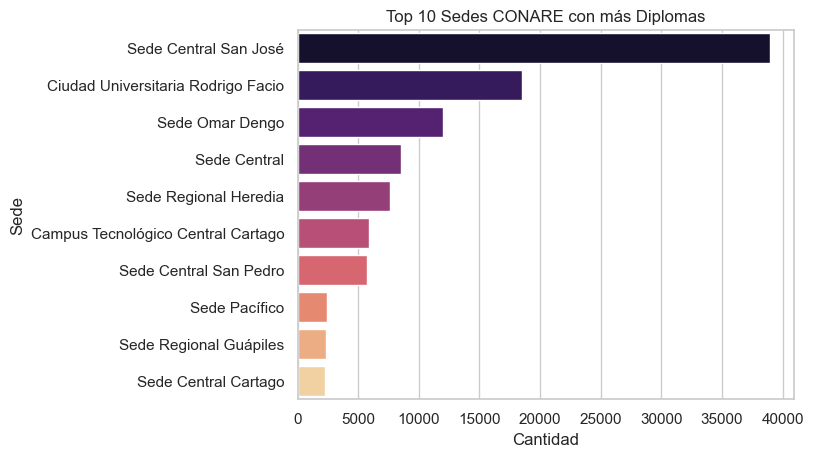

In [33]:
eda.sedes_conare(top_n=10)
